In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from scipy import stats
import seaborn as sns

# Load the Data

This time we'll load the data as geojson and CSV files directly from a github repository I've created at https://github.com/thomaspingel/geodata

In [26]:
# Load polygon data
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/lower48_counties_20m.geojson'
counties = geopandas.read_file(url)

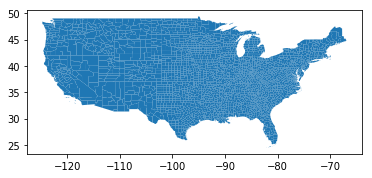

In [27]:
counties.plot()

In [30]:
counties.head()

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01001,01,001,Autauga,County,594.436,"(POLYGON ((-86.496774 32.344437, -86.717896999..."
1,0500000US01009,01,009,Blount,County,644.776,"(POLYGON ((-86.577799 33.765316, -86.759144000..."
2,0500000US01017,01,017,Chambers,County,596.531,"(POLYGON ((-85.18413099999999 32.870525, -85.1..."
3,0500000US01021,01,021,Chilton,County,692.854,"(POLYGON ((-86.51734399999999 33.020566, -86.5..."
4,0500000US01033,01,033,Colbert,County,592.619,"(POLYGON ((-88.139988 34.581703, -88.139246 34..."


In [44]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/state_groups.csv'
groups = pd.read_csv(url,dtype={'fips':'str'})
groups['state_fips'] = groups['fips']
groups.head()

,state,fips,code,region,division,election16,state_fips
0,Alabama,01,AL,South,East South Central,gop,01
1,Alaska,02,AK,West,Pacific,gop,02
2,Arizona,04,AZ,West,Mountain,gop,04
3,Arkansas,05,AR,South,West South Central,gop,05
4,California,06,CA,West,Pacific,dem,06


In [42]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/CHR_2019.csv'
chr_data = groups = pd.read_csv(url,dtype={'fips':'str','state_fips':'str','county_fips':'str'})
chr_data.head()

,fips,state,state_fips,county,county_fips,Premature death - Years of Potential Life Lost Rate - 2019,Premature death - 95% CI - Low - 2019,Premature death - 95% CI - High - 2019,Premature death - Quartile - 2019,Premature death - YPLL Rate (Black) - 2019,...,Demographics - % Hispanic - 2019,Demographics - # Non-Hispanic White - 2019,Demographics - % Non-Hispanic White - 2019,Demographics - # Not Proficient in English - 2019,Demographics - % Not Proficient in English - 2019,Demographics - 95% CI - Low - 2019,Demographics - 95% CI - High - 2019,Demographics - % Female - 2019,Demographics - # Rural - 2019,Demographics - % Rural - 2019
0,01001,Alabama,01,Autauga,001,8824.057123,7935.325830,9712.788417,1,10471.25299,...,2.857452,41336,74.473912,430,0.828548,0.422472,1.234624,51.342246,22921.0,42.002162
1,01003,Alabama,01,Baldwin,003,7224.632160,6794.128380,7655.135940,1,10042.47287,...,4.550200,176582,83.047388,872,0.454512,0.282144,0.626880,51.452772,77060.0,42.279099
2,01005,Alabama,01,Barbour,005,9586.165037,8200.117541,10972.212530,1,11332.56291,...,4.206569,11613,45.955679,297,1.199273,0.580536,1.818011,47.229917,18613.0,67.789635
3,01007,Alabama,01,Bibb,007,11783.543680,10159.978320,13407.109030,3,14812.53928,...,2.638080,16842,74.298571,84,0.394348,0.000000,0.933361,46.453150,15663.0,68.352607
4,01009,Alabama,01,Blount,009,10908.101820,9895.582572,11920.621070,3,NaN,...,9.565097,50439,86.944306,1013,1.870004,1.364180,2.375829,50.688639,51562.0,89.951502


# Visualizing group differences with boxplots

## Joining data

In [47]:
# First, we'll join our groups to our county data frame

df = chr_data.merge(groups,left_on='state_fips',right_on='state_fips')

In [48]:
df.columns.values

array(['fips_x', 'state_x', 'state_fips', 'county', 'county_fips',
       'Premature death - Years of Potential Life Lost Rate - 2019',
       'Premature death - 95% CI - Low - 2019',
       'Premature death - 95% CI - High - 2019',
       'Premature death - Quartile - 2019',
       'Premature death - YPLL Rate (Black) - 2019',
       'Premature death - YPLL Rate (Hispanic) - 2019',
       'Premature death - YPLL Rate (White) - 2019',
       'Poor or fair health - % Fair/Poor - 2019',
       'Poor or fair health - 95% CI - Low - 2019',
       'Poor or fair health - 95% CI - High - 2019',
       'Poor or fair health - Quartile - 2019',
       'Poor physical health days - Physically Unhealthy Days - 2019',
       'Poor physical health days - 95% CI - Low - 2019',
       'Poor physical health days - 95% CI - High - 2019',
       'Poor physical health days - Quartile - 2019',
       'Poor mental health days - Mentally Unhealthy Days - 2019',
       'Poor mental health days - 95% CI - Low -

## Visualizing the differences

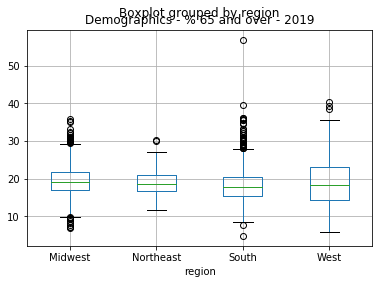

In [53]:
# Pandas has its own boxplot viewer

df.boxplot(column='Demographics - % 65 and over - 2019',by='region')

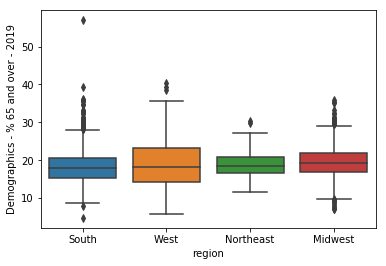

In [60]:
# Seaborn also has a boxplot viewer

sns.boxplot(x='region',y='Demographics - % 65 and over - 2019',data=df)

C:\Users\Thomas Pingel\AppData\Local\ESRI\conda\envs\gis_analysis\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


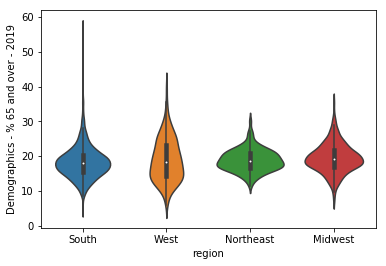

In [61]:
# Seaborn also has a violin plot that some people like better

sns.violinplot(x='region',y='Demographics - % 65 and over - 2019',data=df)

## Play along!  Make 5 different plots of your choosing

# Descriptive Statistics using Pandas Groups

In [66]:
# Use groups like Excel Pivot Tables to rapidly summarize by a category:

grp = df.groupby('region')
grp['Demographics - % 65 and over - 2019'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Midwest,1055.0,19.475292,4.189308,7.015466,17.005484,19.171853,21.859203,35.890252
Northeast,217.0,18.900619,3.155225,11.564637,16.687058,18.576161,20.931771,30.301003
South,1422.0,18.270530,4.486427,4.766509,15.422359,17.901903,20.474367,56.944034
West,448.0,18.935934,6.135200,5.876615,14.198983,18.291988,23.213365,40.367996


In [68]:
# You can request specific statistics on groups as well:

grp['Demographics - % 65 and over - 2019'].median()

region
Midwest      19.171853
Northeast    18.576161
South        17.901903
West         18.291988
Name: Demographics - % 65 and over - 2019, dtype: float64

In [72]:
grp['Demographics - % 65 and over - 2019'].max()

region
Midwest      35.890252
Northeast    30.301003
South        56.944034
West         40.367996
Name: Demographics - % 65 and over - 2019, dtype: float64

## Play along: Request statistics for 10 (total) combinations of variables and groups of your choosing

# T-Tests

T-Tests are used to compare mean differences between two specific groups.  If the p-value is less than .05, the difference in means is statistically significant.

In [95]:
var = 'Demographics - % 65 and over - 2019'
grp_a = df['region']=='Midwest'
grp_b = df['region']=='West'

x = df[var][grp_a]
y = df[var][grp_b]

[t,p] = stats.ttest_ind(x,y,nan_policy='omit')
print('t=',t,'p=',p)

t= 1.9716136183462936 p= 0.04883713035428218


# Effect Sizes

In [97]:
d = abs(np.nanmean(x)-np.nanmean(y)) / np.sqrt((np.std(x)**2 + np.std(y)**2)/2)
print(d)

0.10276714579573021


# ANOVAs

In [98]:
# ANOVA is like a T-test, but for more than one group

var = 'Demographics - % 65 and over - 2019'

grp_a = df['region']=='Midwest'
grp_b = df['region']=='West'
grp_c = df['region']=='South'
grp_d = df['region']=='Northeast'

a = df[var][grp_a]
b = df[var][grp_b]
c = df[var][grp_c]
d = df[var][grp_d]

f,p = stats.f_oneway(a,b,c,d)
print('f=',f,'p=',p)

f= 14.083410816437954 p= 4.061419987981336e-09
